### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import os
print(os.listdir("archive"))

['cell_images']


In [2]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import random

## Reading the data

In [3]:
parasitized_data = os.listdir('archive/cell_images/cell_images/Parasitized/')
print(parasitized_data[:10])

uninfected_data = os.listdir('archive/cell_images/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png']


['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png', 'C100P61ThinF_IMG_20150918_144104_cell_34.png', 'C100P61ThinF_IMG_20150918_144104_cell_48.png', 'C100P61ThinF_IMG_20150918_144104_cell_65.png', 'C100P61ThinF_IMG_20150918_144348_cell_108.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png']


In [4]:
print("Parasitized Images :",len(parasitized_data))
print("Uninfected Images :",len(uninfected_data))

Parasitized Images : 13779
Uninfected Images : 13779


## DATA PREPROCESSING:

### Sample Images from Dataset:

Parasitized:

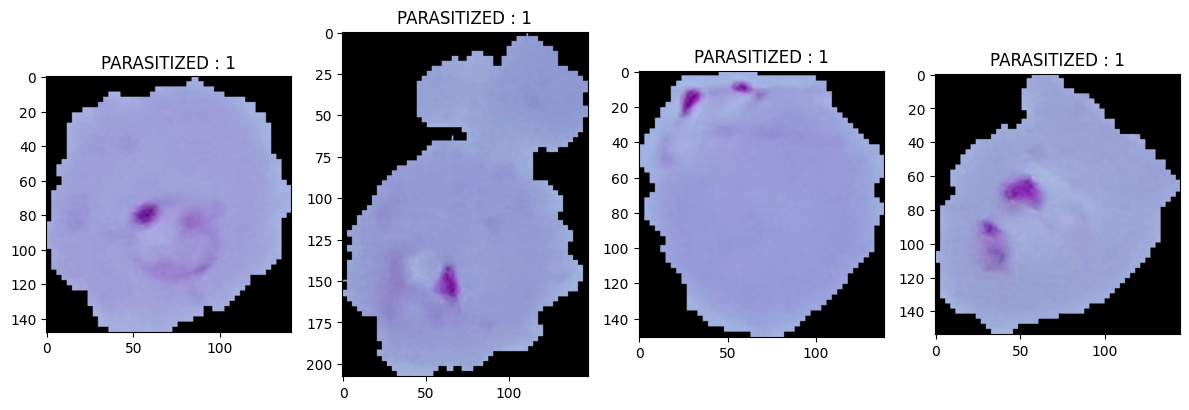

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('archive/cell_images/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

Uninfected:

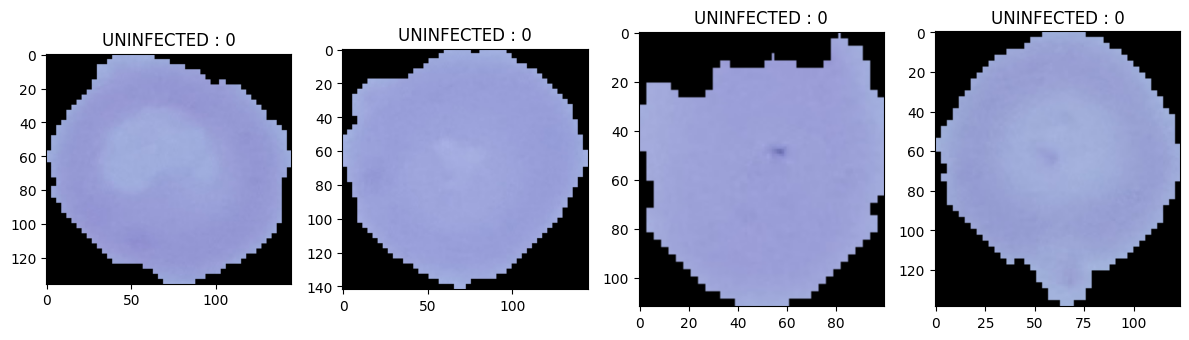

In [6]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('archive/cell_images/cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

### Resizing Image:

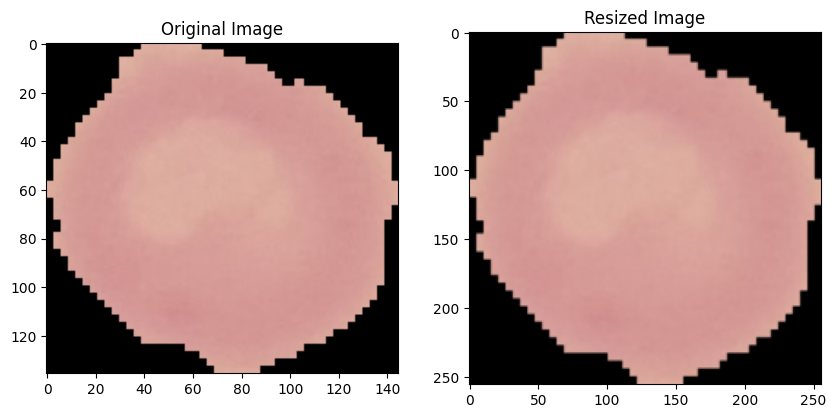

In [7]:
img = cv2.imread('archive/cell_images/cell_images/Uninfected' + "/" + uninfected_data[1])

resized_img = cv2.resize(img, (256, 256))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
ax[1].set_title('Resized Image')
plt.show()


### GrayScale Conversion:

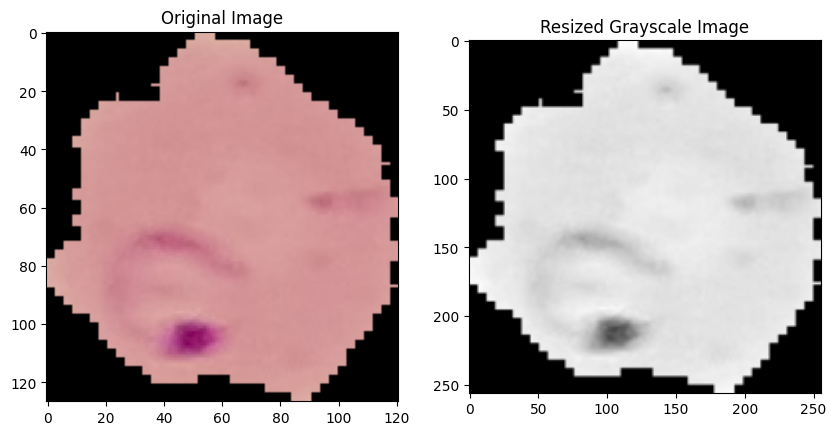

In [8]:
img = cv2.imread('archive/cell_images/cell_images/Parasitized' + "/" + parasitized_data[163])

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized_gray_img = cv2.resize(gray_img, (256, 256))
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(resized_gray_img, cmap='gray')
ax[1].set_title('Resized Grayscale Image')
plt.show()


### Normalization:

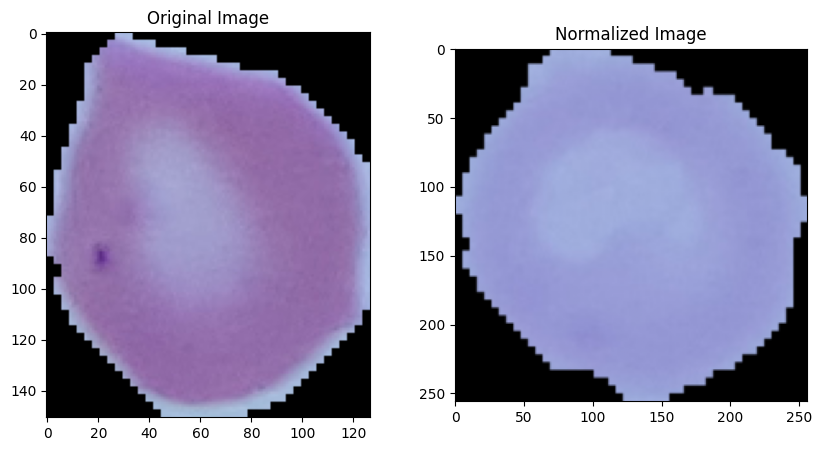

In [9]:
img = cv2.imread('archive/cell_images/cell_images/Uninfected' + "/" + uninfected_data[156])
normalized_img = resized_img / 255.0 # type: ignore

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(normalized_img)
ax[1].set_title('Normalized Image')
plt.show()

# DATA VISUALIZATION:

### Sample Images from Dataset:

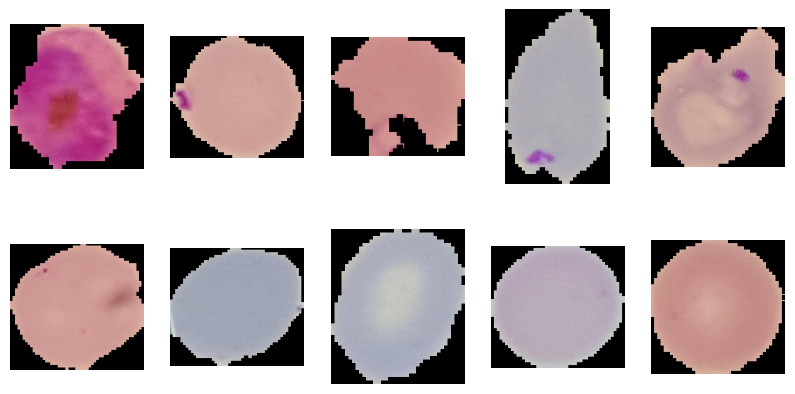

In [10]:
parasitized_dir = 'archive/cell_images/cell_images/Parasitized'
uninfected_dir = 'archive/cell_images/cell_images/Uninfected'

parasitized_samples = random.sample(parasitized_data, 5)
uninfected_samples = random.sample(uninfected_data, 5)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, file in enumerate(parasitized_samples):
    img = cv2.imread(os.path.join(parasitized_dir, file))
    axes[0][i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0][i].axis('off')
for i, file in enumerate(uninfected_samples):
    img = cv2.imread(os.path.join(uninfected_dir, file))
    axes[1][i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[1][i].axis('off')
plt.show()

### Distribution of Classes:

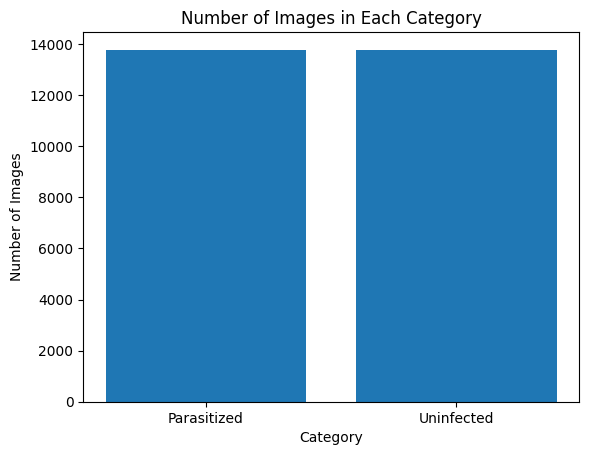

In [11]:
num_parasitized_images = len(parasitized_data)
num_uninfected_images = len(uninfected_data)

categories = ['Parasitized', 'Uninfected']
counts = [num_parasitized_images, num_uninfected_images]
plt.bar(categories, counts)
plt.title('Number of Images in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()

### Pixel Intensity Distribution:

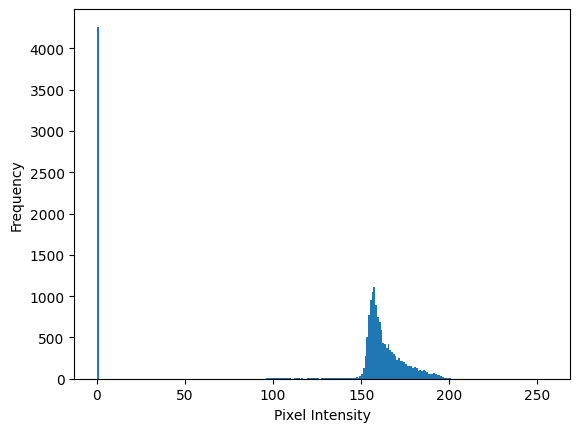

In [12]:
img = cv2.imread('archive/cell_images/cell_images/Parasitized' + "/" + parasitized_data[4876])
plt.hist(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

### Colour Channel Analysis:

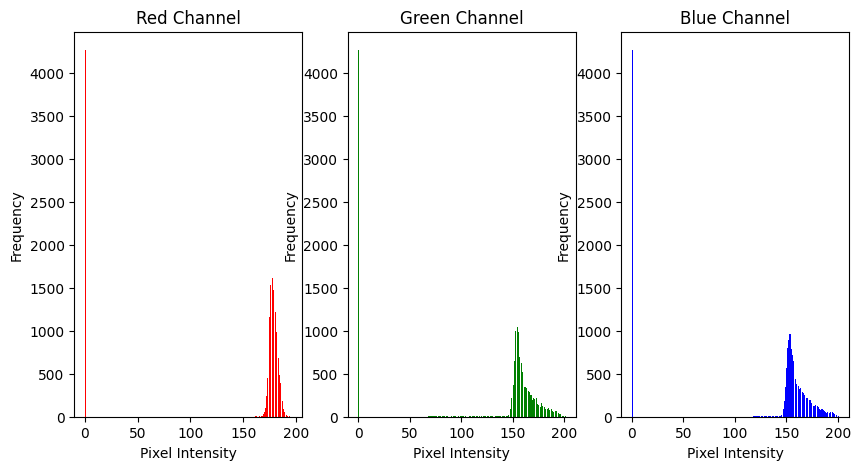

In [13]:
img = cv2.imread('archive/cell_images/cell_images/Parasitized' + "/" + parasitized_data[4876])

red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].hist(red_channel.ravel(), bins=256, color='red')
ax[0].set_xlabel('Pixel Intensity')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Red Channel')
ax[1].hist(green_channel.ravel(), bins=256, color='green')
ax[1].set_xlabel('Pixel Intensity')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Green Channel')
ax[2].hist(blue_channel.ravel(), bins=256, color='blue')
ax[2].set_xlabel('Pixel Intensity')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Blue Channel')
plt.show()

In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

### Preparing train and test Image Generator

In [21]:
width = 128
height = 128

In [22]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [23]:
trainDatagen = datagen.flow_from_directory(directory='archive/cell_images/cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [24]:
valDatagen = datagen.flow_from_directory(directory='archive/cell_images/cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


### Preparing the model

In [25]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 63, 63, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 30, 30, 32)       

Compiling model


In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Early stop mechanism

In [29]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

Fitting model

In [ ]:
history = model.fit(x=trainDatagen,
                    steps_per_epoch=len(trainDatagen),
                    epochs=20,
                    validation_data=valDatagen,
                    validation_steps=len(valDatagen),
                    callbacks=[early_stop])

Epoch 1/20
1378/1378 [==============================] - 254s 184ms/step - loss: 0.3922 - accuracy: 0.8184 - val_loss: 0.2078 - val_accuracy: 0.9296
Epoch 2/20
1378/1378 [==============================] - 152s 110ms/step - loss: 0.1704 - accuracy: 0.9478 - val_loss: 0.1622 - val_accuracy: 0.9403
Epoch 3/20
1378/1378 [==============================] - 150s 109ms/step - loss: 0.1528 - accuracy: 0.9536 - val_loss: 0.2194 - val_accuracy: 0.9396
Epoch 4/20
1378/1378 [==============================] - 148s 108ms/step - loss: 0.1451 - accuracy: 0.9548 - val_loss: 0.1615 - val_accuracy: 0.9490
Epoch 5/20
1378/1378 [==============================] - 149s 108ms/step - loss: 0.1375 - accuracy: 0.9574 - val_loss: 0.1605 - val_accuracy: 0.9494
Epoch 6/20
1378/1378 [==============================] - 154s 112ms/step - loss: 0.1325 - accuracy: 0.9587 - val_loss: 0.1807 - val_accuracy: 0.9495
Epoch 7/20
1378/1378 [==============================] - 155s 113ms/step - loss: 0.1253 - accuracy: 0.9599 - val_

Saving model

In [ ]:
model.save("cnn1.h5")

Plots

In [ ]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

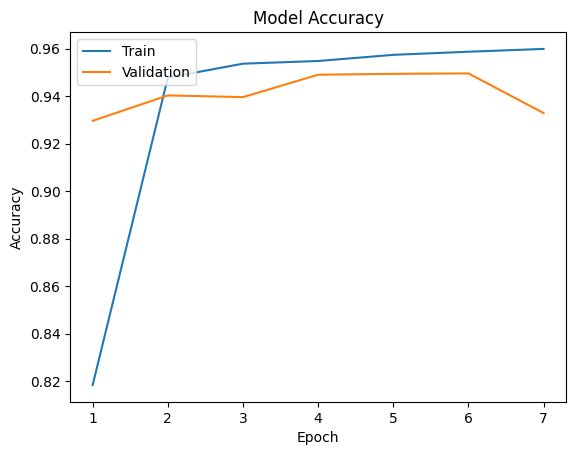

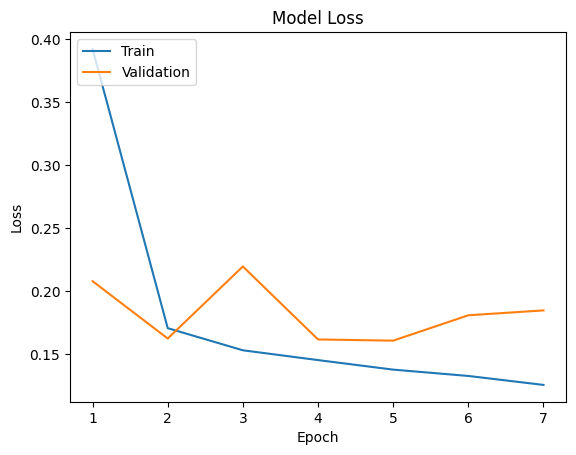

In [ ]:
plotLearningCurve(history,7)

Classification Report

In [ ]:
#classification report
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

pred = model.predict(valDatagen)
pred = np.round(pred).astype(int).reshape(1,-1)[0]
print(classification_report(valDatagen.classes,pred,target_names=['Parasitized','Uninfected']))

345/345 [==============================] - 10s 28ms/step
              precision    recall  f1-score   support

 Parasitized       0.49      0.44      0.47      2755
  Uninfected       0.49      0.54      0.51      2755

    accuracy                           0.49      5510
   macro avg       0.49      0.49      0.49      5510
weighted avg       0.49      0.49      0.49      5510



Accuracy of the model

In [ ]:
print("Accuracy: ",max(history.history['accuracy'])*100)

Accuracy:  95.98603248596191
